In [1]:
import visuals as vs
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
import random
ru = random.uniform

In [2]:
data = pd.read_csv('C:/Users/michael/appdata/local/programs/python/python39/PROJECTS/Data/Grid_Data.csv')

In [3]:
data.head()
#tau[x]: Averaging Time - reaction time of participant (real from the range[0.5,10]s). Tau1 - the value for electricity producer
#p[x]: Coupling Strength - nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s*-2; p1 = abs(p2+p3+p4)
#g[x]: Damping - coefficient (gamma) proportional to price elasticity (real from the range [0.05, 1]s^-1). g1 - the value for electricity producer
#stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable) (real)
#stabf: the stability label of the system (categorical: stable/unstable)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
stability_values = data['stab']
features = data.drop(['p1', 'stab', 'stabf'], axis=1)

In [5]:
stability_values.describe()

count    10000.000000
mean         0.015731
std          0.036919
min         -0.080760
25%         -0.015557
50%          0.017142
75%          0.044878
max          0.109403
Name: stab, dtype: float64

In [6]:
from sklearn.metrics import r2_score

In [7]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, stability_values, test_size=0.25, random_state=12)
print("Train & Test split successful")

Train & Test split successful


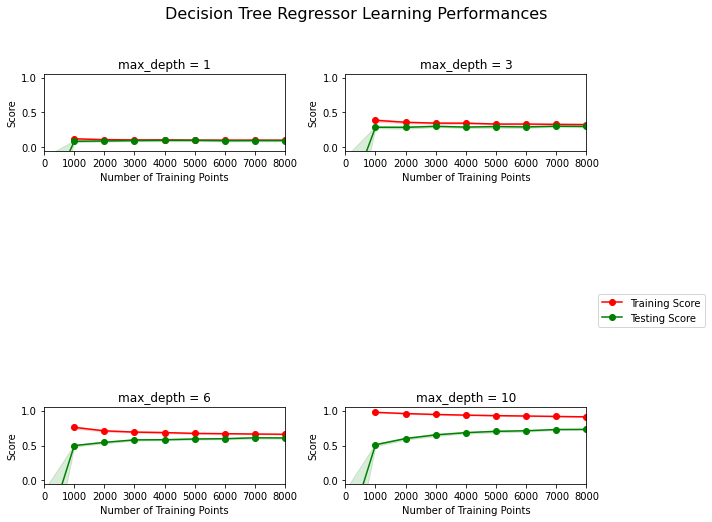

In [10]:
vs.ModelLearning(features, stability_values)

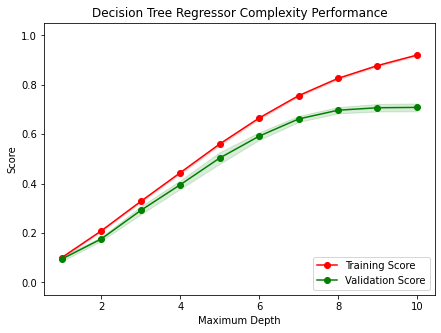

In [11]:
vs.ModelComplexity(x_train, y_train)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [13]:
def fit_model(x, y):
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(x, y)
    return grid.best_estimator_

In [14]:
reg = fit_model(x_train, y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


In [15]:
prediction_data = [[ru(.5, 10), ru(.5, 10), ru(.5, 10), ru(.5, 10), ru(-2, -0.5), ru(-2, -0.5), ru(-2, -0.5), ru(.05, 1), ru(.05, 1), ru(.05, 1), ru(.05, 1)],
    [ru(.5, 10), ru(.5, 10), ru(.5, 10), ru(.5, 10), ru(-2, -0.5), ru(-2, -0.5), ru(-2, -0.5), ru(.05, 1), ru(.05, 1), ru(.05, 1), ru(.05, 1)],
    [ru(.5, 10), ru(.5, 10), ru(.5, 10), ru(.5, 10), ru(-2, -0.5), ru(-2, -0.5), ru(-2, -0.5), ru(.05, 1), ru(.05, 1), ru(.05, 1), ru(.05, 1)]]
print(prediction_data)
for i, stability in enumerate(reg.predict(prediction_data)):
    print("Predicted stability of Grid given Independent Variables: {}, {:.4f}".format("Stable" if stability<0 else "Unstable", stability))

[[0.9179262935059316, 0.6793105739348408, 5.584945414052857, 9.625281132333608, -0.6648230748600401, -0.8137728960161863, -0.9820024672874927, 0.29770459008414313, 0.07337551340935614, 0.3313585011123503, 0.940370192879026], [4.069516824844527, 7.210264380631147, 8.767441872929162, 1.7259053877488961, -1.4126551633413764, -1.9926388743578907, -1.5809398709499614, 0.12632991307249533, 0.15755537496377658, 0.6527722893084447, 0.09116432528972765], [2.2536271629142774, 4.742422717483529, 6.209500478510591, 6.156189878417095, -0.8155578790337161, -1.6220191197560698, -0.7892998969951173, 0.9910683305638811, 0.4513780474068316, 0.6367249597887691, 0.7407316076104543]]
Predicted stability of Grid given Independent Variables: Stable, -0.0215
Predicted stability of Grid given Independent Variables: Unstable, 0.0000
Predicted stability of Grid given Independent Variables: Unstable, 0.0379


In [16]:
vs.PredictTrials(features, stability_values, fit_model, prediction_data)

Trial 1: Stable, -0.0141
Trial 2: Stable, -0.0154
Trial 3: Stable, -0.0280
Trial 4: Stable, -0.0206
Trial 5: Stable, -0.0110
Trial 6: Stable, -0.0075
Trial 7: Stable, -0.0167
Trial 8: Stable, -0.0089
Trial 9: Stable, -0.0232
Trial 10: Stable, -0.0241

Range in stability: 0.0204


In [17]:
data['stabf'].describe()

count        10000
unique           2
top       unstable
freq          6380
Name: stabf, dtype: object